### 1. Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

### 2. Business Problem:

#### 1) Prepare a classification model using Naive Bayes for salary data 

#### Data Description:

#### age -- age of a person
#### workclass	-- A work class is a grouping of work 
#### education	-- Education of an individuals	
#### maritalstatus -- Marital status of an individulas	
#### occupation	 -- occupation of an individuals
#### relationship -- 	
#### race --  Race of an Individual
#### sex --  Gender of an Individual
#### capitalgain --  profit received from the sale of an investment	
#### capitalloss	-- A decrease in the value of a capital asset
#### hoursperweek -- number of hours work per week	
#### native -- Native of an individual
#### Salary -- salary of an individual

### 3. Data collection and Description

In [2]:
salarytest_data = pd.read_csv('SalaryData_Test.csv')
salarytrain_data = pd.read_csv('SalaryData_Train.csv')

In [3]:
salary_data = salarytest_data.append(salarytrain_data)

In [4]:
salarytest = salarytest_data.copy()
salarytrain = salarytrain_data.copy()

In [5]:
salarytest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
salarytrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

In [9]:
for i in str_c:
    salarytrain[i]= number.fit_transform(salarytrain[i])
    salarytest[i]=number.fit_transform(salarytest[i])

In [10]:
salarytest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
salarytrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
salarytrain = salarytrain.replace({'Salary': mapping})
salarytest = salarytest.replace({'Salary': mapping})

In [14]:
salarydata= salarytrain.append(salarytest) 

In [15]:
salarydata1= salarydata.copy()

In [16]:
salarydata1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [17]:
salarydata1.shape

(45221, 14)

In [18]:
salarydata1.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int64
dtype: object

In [19]:
salarydata1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
salarydata1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


### Finding Correlation

In [21]:
corr = salarydata1.corr()

<AxesSubplot:>

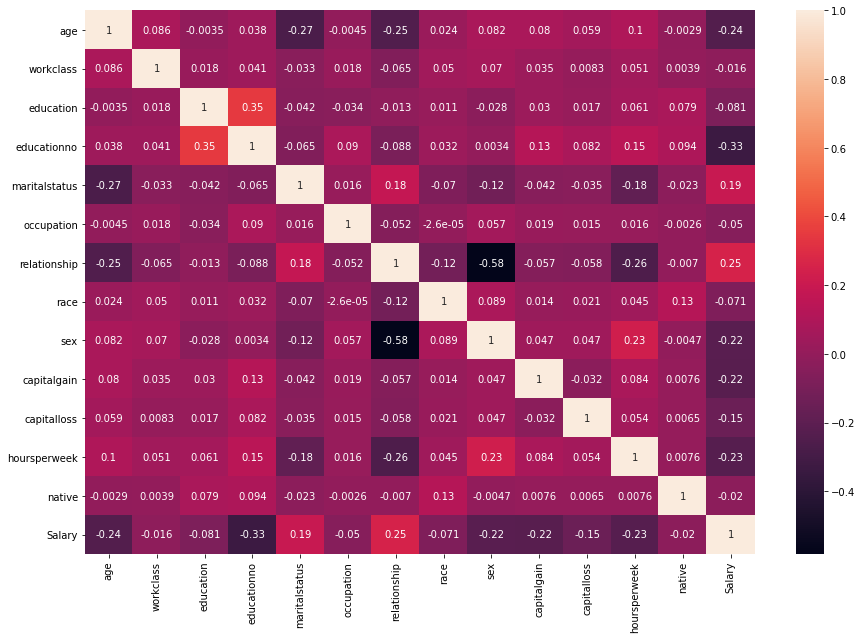

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [23]:
plt.rcParams["figure.figsize"] = 10,5

Skew:-0.31062061074424
Kurtosis:0.6350448194491634


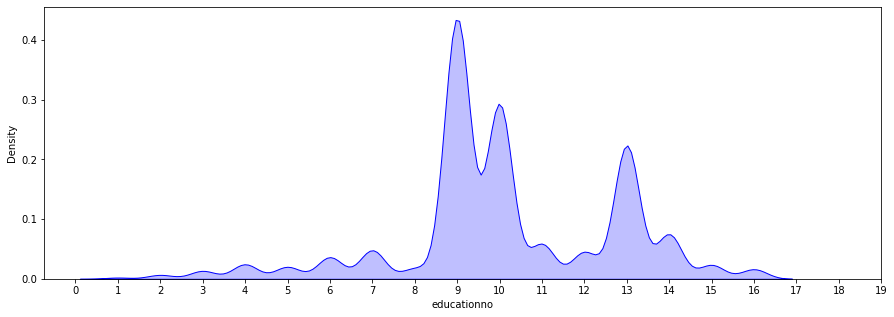

In [24]:
plt.figure(figsize=(15,5))
print("Skew:{}".format(salarydata1['educationno'].skew()))
print("Kurtosis:{}".format(salarydata1['educationno'].kurtosis()))
ax = sns.kdeplot(salarydata1['educationno'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### The Data is negatively skewed and has low kurtosis value
#### Most of people have eduction Number of years of education 8 - 11

In [42]:
dfa = salary_data[salary_data.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

ValueError: num must be 1 <= num <= 4, not 5

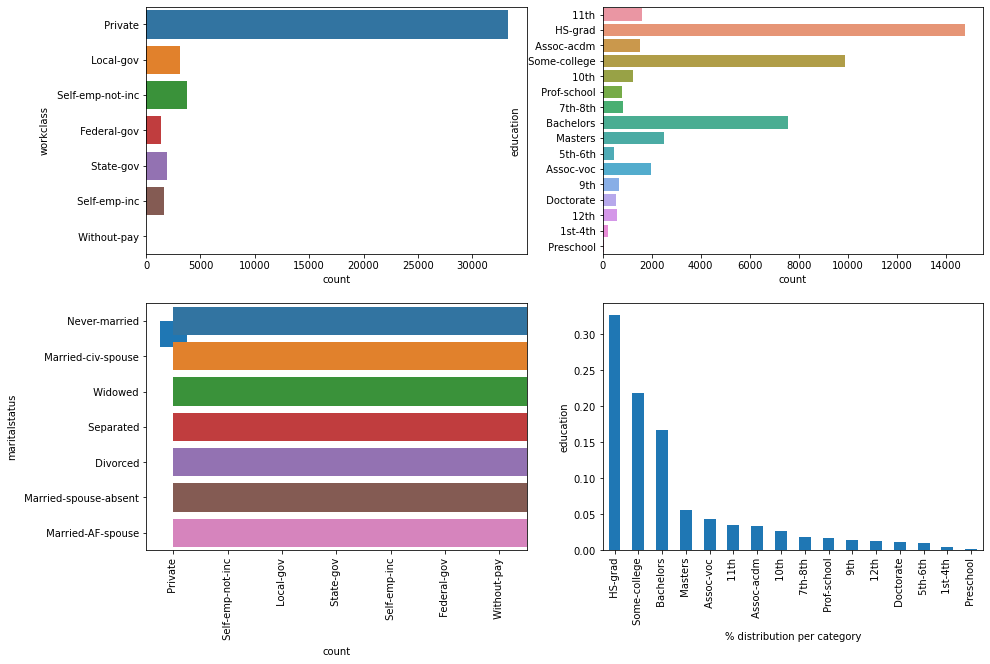

In [43]:
plt.figure(figsize=(15,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    salary_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

#### Majority of the workclass is in Private Sector
#### Also for education mojority of the people have HS graduation or some college degree

In [44]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

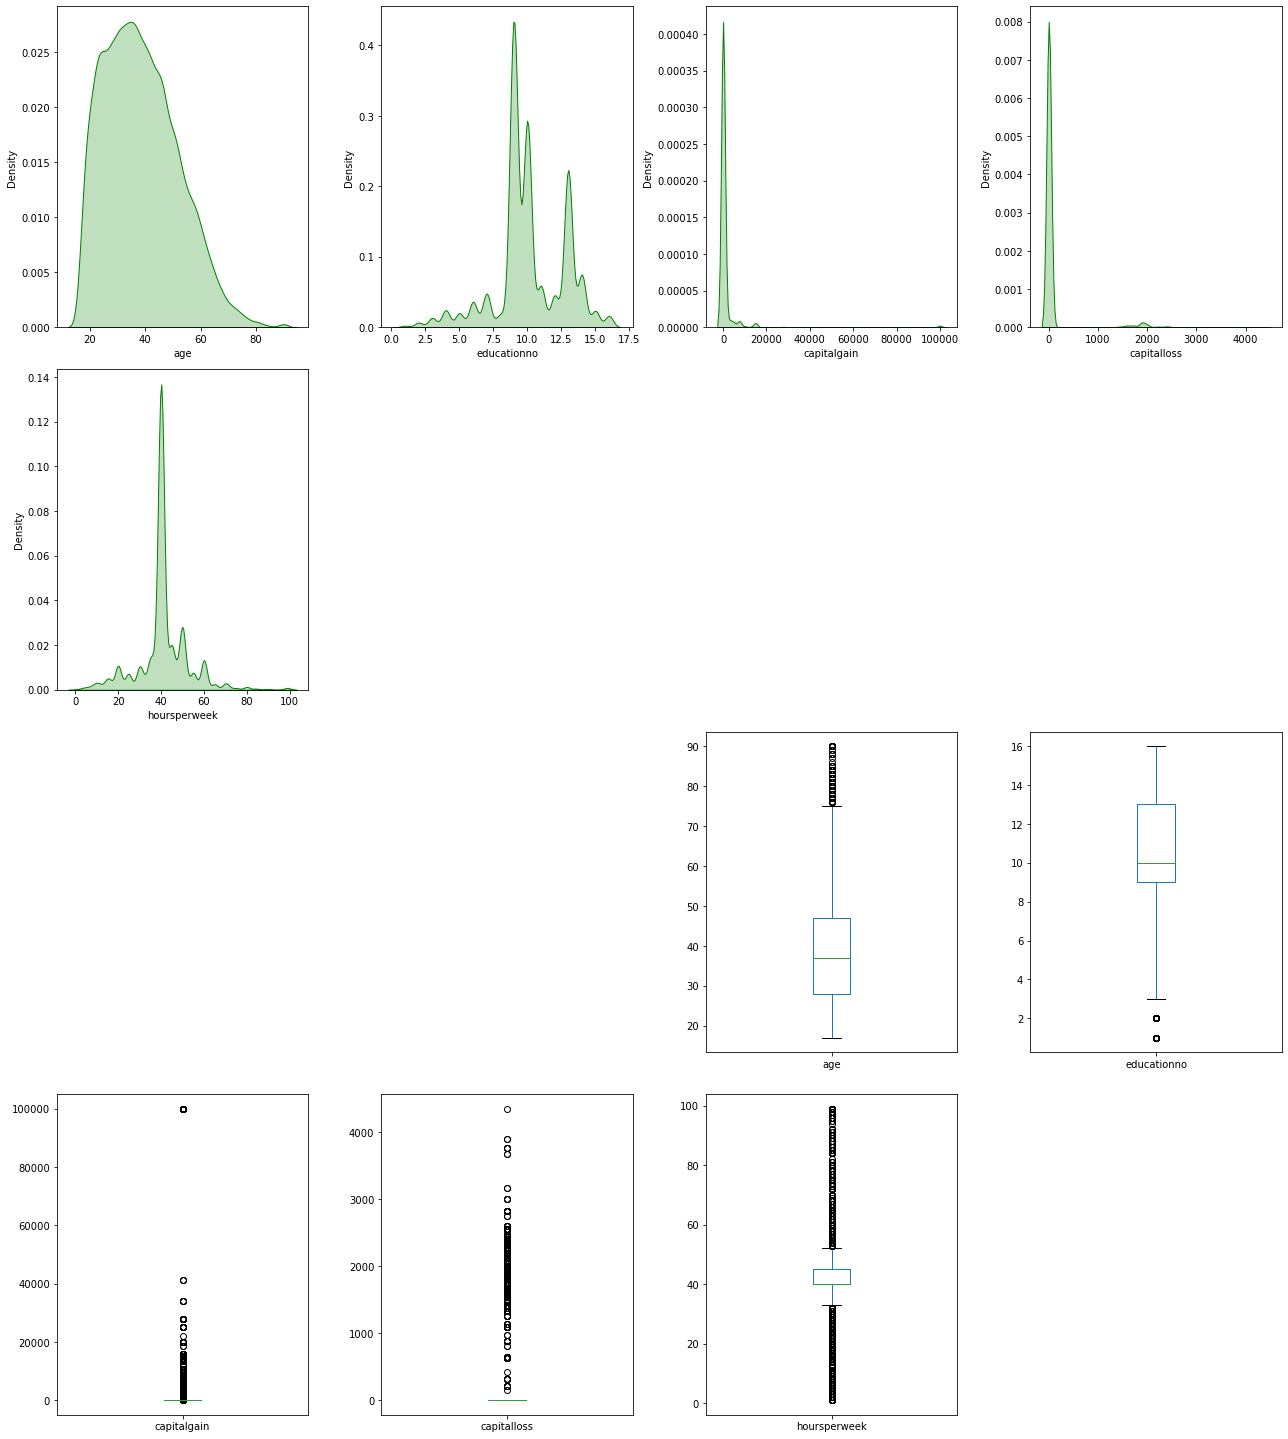

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [65]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(salary_data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    salary_data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = salary_data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### 4. Naive Bayes

In [46]:
x_train = salarytrain.iloc[:,0:13]
y_train = salarytrain.iloc[:,13]
x_test = salarytest.iloc[:,0:13]
y_test = salarytest.iloc[:,13]

### 4.1 GaussianNB

In [47]:
clsfrgnb = GaussianNB()

In [48]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [50]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [51]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [52]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


### 4.2 MultinomialNB 

In [53]:
clsfrmnb = MultinomialNB()

In [54]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [55]:
y_pred_mnb = clsfrmnb.predict(x_test)

In [56]:
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [57]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [58]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


### 5. Conclusion & Cross Validation

#### GaussianNB Model has a better Accuracy, Thus we will use GaussianNB Classifier
#### We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [78]:
seed = 7

In [79]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [80]:
results = []
names = []
scoring = 'accuracy'

In [81]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.801797 (0.006298)
LDA: 0.810650 (0.008475)
KNN: 0.834455 (0.005149)
CART: 0.806207 (0.004266)
NB: 0.795498 (0.006570)


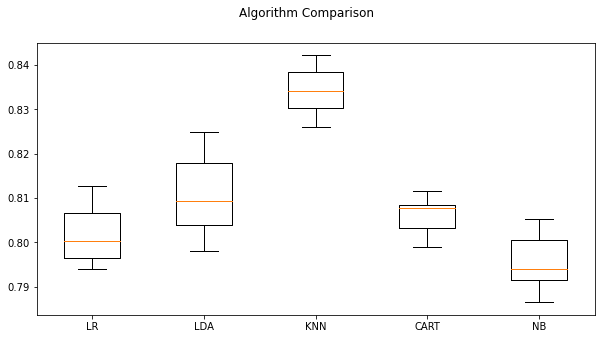

In [85]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### In comparision KNN has the best Accuracy